X
[37, 107, 28, 3, 54, 59, 110, 17, 116, 103, 50, 106, 109, 71, 34, 114, 85, 69, 11, 121, 6, 83, 89, 104, 57, 119, 15, 1, 62, 94, 44, 105, 36, 87, 84, 22, 14, 88, 111, 4, 101, 95, 13, 51, 112, 45, 43, 63, 92, 91, 30, 39, 2, 23, 29, 73, 0, 19, 72, 82, 31, 117, 40, 58, 99, 20, 65, 60, 35, 120, 52, 102, 27, 66, 98, 96, 122, 67, 47, 48, 26, 53, 38, 75, 12, 64, 18, 33, 68, 97, 86, 41, 70, 80, 46, 24, 7, 42, 8, 32, 113, 55, 118, 9, 5, 10, 90, 16, 78, 108, 81, 49, 21, 115, 100, 77, 76, 74, 56, 79, 61, 25, 93]


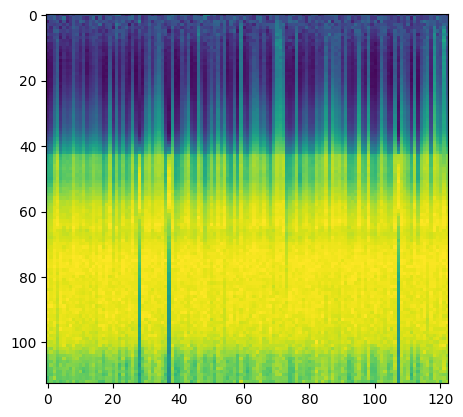

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('blood1X.npz')

lst = data.files
for item in lst:
    print(item)
    plt.imshow(data[item].transpose())
    
    print([x[0] for x in sorted(enumerate(data[item]), key=lambda x: x[1][90])])

## IsolationForest to metoda izolacji anomalii.

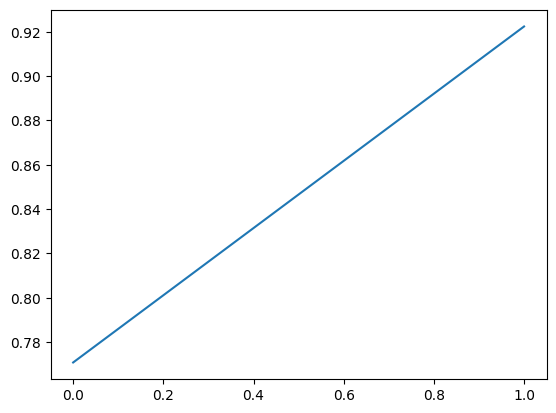

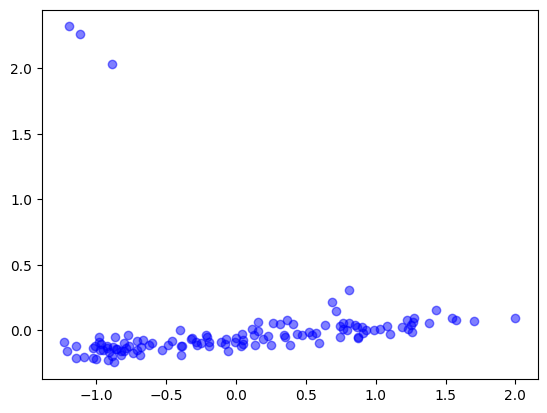

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


X = np.load('blood1X.npz')['X']
from sklearn.decomposition import PCA

n_components = 2

pca = PCA(n_components=n_components).fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
pca = PCA(n_components=n_components).fit_transform(X)
plt.scatter(pca[:, 0], pca[:, 1], c='blue', alpha=0.5)
plt.show()
# for i in range(n_components):
#     plt.plot(pca.components_[i])


In [3]:
from sklearn.ensemble import IsolationForest

X = np.load('blood2X.npz')['X']
# we know there are 3 outliers
ifresult = IsolationForest(n_estimators=1000, contamination=3/len(X)).fit_predict(X)

print(np.argsort(ifresult))

[ 74 267 194 205 204 203 202 201 200 198 206 197 196 195 193 192 199 207
   0 209 225 224 223 222 221 220 219 191 218 216 215 214 213 212 211 210
 217 208 189 188 168 167 166 165 164 163 162 161 160 159 158 157 156 155
 154 169 190 170 172 187 186 185 184 183 182 181 180 179 178 177 176 175
 174 173 171 226 227 228 281 280 279 278 277 276 282 275 273 272 271 270
 269 268 274 283 284 285 300 299 298 297 296 295 294 293 292 291 290 289
 288 287 286 266 265 264 263 243 242 241 240 239 238 237 236 235 234 233
 232 231 230 229 244 153 245 247 262 261 260 259 258 257 256 255 254 253
 252 251 250 249 248 246 152 151 150  53  52  51  50  49  48  47  46  45
  44  43  42  41  40  39  54  38  55  57  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  56  73  37  35  15  14  13  12  11  10   9
   8   7   6   5   4   3   2   1  16  36  17  19  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  18 301  75  77 130 129 128 127 126
 125 124 123 122 121 120 119 118 117 116 131 115 13

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from numpy.random import randn, uniform
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler

In [5]:
# best = 0
# best_labels = 0
# import math

# def findreatestDiffIdx(array):
#     best_i = -1
#     best_val = 0
#     for i, val in enumerate(array, start=1):
#         current = abs(val - array[i-1])
#         if (current > best_val):
#             best_i = i - 1
#             best_val = val
#     return best_i

# results = []
# for x in range(1, int(len(X)/2)):
#     ifor = IsolationForest(contamination=x/len(X)).fit_predict(X) 
#     result = np.argsort(ifor)[:x]
#     mean = abs(np.mean(X[result]))
#     score = np.mean(X) - mean
#     results.append({ score })
#     print("predictive power: ", score, x)
#     # labels = kmeans_model.labels_
    # score = silhouette_score(X, labels, metric='euclidean')
    # if (score > best):
    #     best = score
    #     best_labels = labels


In [6]:
totalMean = np.mean(X)
clusters = {}
for cluster_label in set(best_labels):
    clusters[cluster_label] = [i for i, x in enumerate(best_labels) if x == cluster_label]
    
for cluster_key, cluster in clusters.items():
    mean = np.mean(X[cluster])
    print(cluster)
    print(cluster_key, mean)


NameError: name 'best_labels' is not defined

In [ ]:
X = np.load('blood1X.npz')['X']

best = 0
best_labels = 0

results = []
ifor = IsolationForest().fit(X)
iforScores = ifor.score_samples(X)
iforScoresSortedIndexes = np.argsort(iforScores)

def findBiggestDiff(sortedScores):
    best_i = -1
    best_val = 0
    for i in range(1, len(sortedScores)):
        val = abs(abs(sortedScores[i]) - abs(sortedScores[i-1]))
        if best_val < val:
            best_i = i
            best_val = val
    return best_i

cutoff = findBiggestDiff(iforScores[iforScoresSortedIndexes])
print(cutoff)
print(iforScoresSortedIndexes[:cutoff])

3
[ 37  28 107]


Text(0.5, 0, 'Indeks frekwencji')

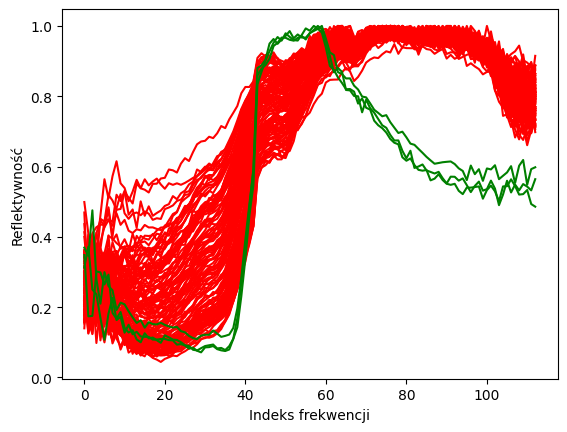

In [ ]:
import matplotlib.pyplot as plt
picture_list = np.load('blood1X.npz')['X']
    
for picture in picture_list[iforScoresSortedIndexes][cutoff:]:
    plt.plot(picture, color="red")

for picture in picture_list[iforScoresSortedIndexes][:cutoff]:
    plt.plot(picture, color="green")

plt.ylabel('Reflektywność')
plt.xlabel('Indeks frekwencji')


In [ ]:
best_blood = picture_list[iforScoresSortedIndexes][:cutoff][0]
print(best_blood)

[0.3130876  0.3717279  0.2502066  0.23651433 0.16932872 0.1071416
 0.18145394 0.22599468 0.16312711 0.17258297 0.12732568 0.1499839
 0.12266951 0.12972939 0.11668849 0.11534104 0.11535645 0.10766003
 0.10755986 0.10931092 0.1094465  0.10608527 0.10543068 0.09329997
 0.09499153 0.09063568 0.08209611 0.08449914 0.07595443 0.07136553
 0.08545646 0.08613569 0.08930179 0.08049573 0.07702234 0.07515933
 0.07949502 0.10964894 0.14257105 0.23120302 0.33768436 0.46050546
 0.54744816 0.8341573  0.86917067 0.90171915 0.92787194 0.9521673
 0.96833146 0.95809644 0.9791238  0.9688037  0.959696   0.95836645
 0.9741261  0.9929398  0.9862829  1.         0.991912   0.98119587
 0.9382574  0.88588107 0.8750059  0.85333747 0.83775467 0.8199312
 0.8204422  0.8130595  0.7790818  0.7937882  0.76720685 0.7619232
 0.730401   0.7173965  0.7090654  0.69667566 0.6783815  0.667664
 0.6632111  0.6263212  0.61646336 0.62300724 0.60414726 0.590524
 0.58817947 0.5901334  0.56067115 0.5654495  0.57797307 0.5616393
 0.55

Cluster 0 samples: [   36    37    56 ... 40133 40134 40135]
Cluster 1 samples: [    0     1     2 ... 39932 39933 39934]
Cluster 2 samples: [   38    39    40 ... 40113 40114 40115]
Cluster 3 samples: [  206   907  1140 ... 40124 40125 40130]
Cluster 4 samples: [   35   267   499 ... 39944 39945 39946]
Cluster 5 samples: [ 1374  1607  2013 ... 40071 40072 40073]


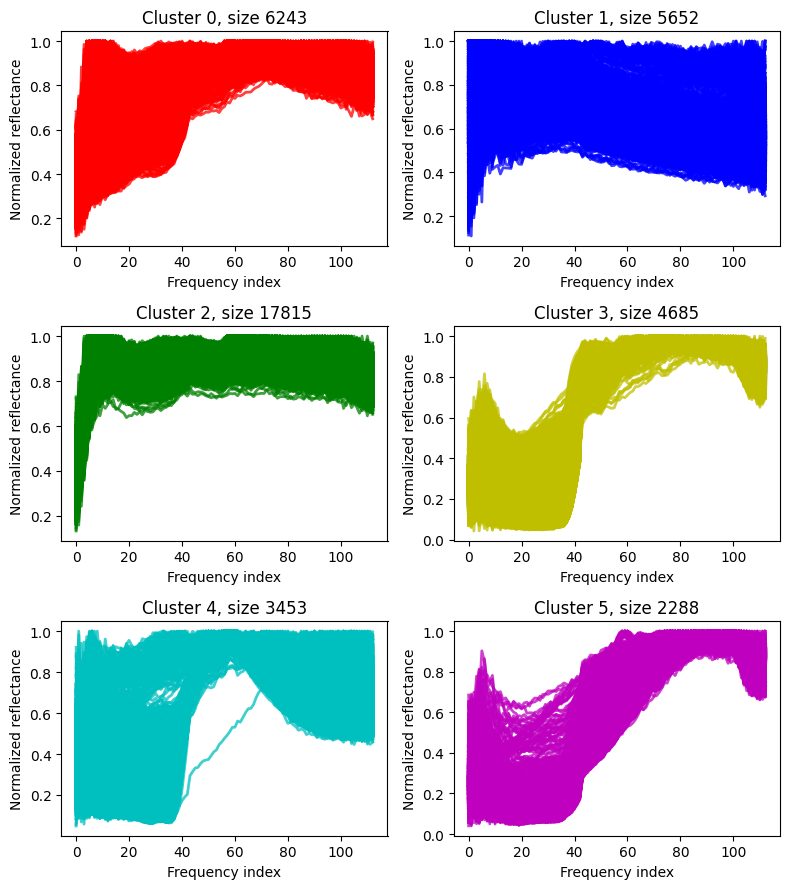

Accuracy 99.47%


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, euclidean_distances


clustering = 0
def verify(record, result):
    true_blood = record['anno'].ravel() == 1
    uncertain_blood = record['anno'].ravel() == 8
    blood = np.logical_or(true_blood, uncertain_blood)
    print(f'Accuracy {accuracy_score(result, blood):.2%}')


if __name__ == '__main__':
    fname = 'd01_frame_I300'
    #fname = 'd01_comparison_I350'
    record = np.load(f'{fname}.npz')
    
    data = record['data']
    X = np.reshape(data, (-1, data.shape[-1]))

    n_clusters = 6
    clustering = KMeans(n_clusters=n_clusters).fit(X)


    plt.figure(figsize=(8, 9))
    for i, label in enumerate(set(clustering.labels_)):
        index = clustering.labels_ == label
        Xlabel = X[index]
        print(f'Cluster {label} samples:', np.arange(len(X))[index])
        plt.subplot(321 + i)
        for x in Xlabel:
            plt.plot(x / np.max(x), '-', lw=2, alpha=0.75, color='rbgycmk'[label])
        plt.xlabel('Frequency index')
        plt.ylabel('Normalized reflectance')
        plt.title(f'Cluster {label}, size {np.count_nonzero(index)}')
    plt.tight_layout()
    plt.show()

    blood_label = int(input('Which cluster?'))
    result = clustering.labels_ == blood_label

    verify(record, result)


In [14]:
print(clustering)
from sklearn.metrics import accuracy_score, euclidean_distances
import scipy


for i, label in enumerate(set(clustering.labels_)):
    index = clustering.labels_ == label
    Xlabel = X[index]
    #euclidean_distances(np.mean(Xlabel, axis=2), best_blood)
    redone = np.array([np.mean(x) for x in Xlabel.T])
    for i in range(len(Xlabel)):
        print(i)

KMeans(n_clusters=6)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
2